## Customer Retention Analysis for Online Retail Store

In [1]:
# import pytho modules for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

## Loading the Dataset

In [23]:
url = "https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Analytics-with-Python/Exploratory-Data-Analysis-with-Python/Exploratory-Data-Analysis-for-Online-Retail-Store/grouped_daily_customer_data.csv"
daily_customers_sales_df = pd.read_csv(url, parse_dates=['Date', 'MonthYear'])

* Preview the Dataset

In [24]:
daily_customers_sales_df.dtypes

CustomerID                      float64
Date                     datetime64[ns]
Country                          object
MonthYear                datetime64[ns]
TotalAmount                     float64
CountOfUniqueInvoices             int64
dtype: object

* Convert CustomerID from float64 to string

In [25]:
## using dictionary to convert specific columns
convert_dic = {
    'CustomerID': str
}
daily_customers_sales_df = daily_customers_sales_df.astype(convert_dic)

In [26]:
print(daily_customers_sales_df.shape)
daily_customers_sales_df.head()

(16766, 6)


,CustomerID,Date,Country,MonthYear,TotalAmount,CountOfUniqueInvoices
0,12346.0,2011-01-18,United Kingdom,2011-01-01,77183.60,1
1,12347.0,2010-12-07,Iceland,2010-12-01,711.79,1
2,12347.0,2011-01-26,Iceland,2011-01-01,475.39,1
3,12347.0,2011-04-07,Iceland,2011-04-01,636.25,1
4,12347.0,2011-06-09,Iceland,2011-06-01,382.52,1


In [27]:
daily_customers_sales_df.describe(include='all')

C:\Users\HP\AppData\Local\Temp\ipykernel_16820\821053191.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  daily_customers_sales_df.describe(include='all')
C:\Users\HP\AppData\Local\Temp\ipykernel_16820\821053191.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  daily_customers_sales_df.describe(include='all')


,CustomerID,Date,Country,MonthYear,TotalAmount,CountOfUniqueInvoices
count,16766,16766,16766,16766,16766.000000,16766.000000
unique,4339,305,37,13,NaN,NaN
top,14911.0,2011-11-17 00:00:00,United Kingdom,2011-11-01 00:00:00,NaN,NaN
freq,132,125,15095,2391,NaN,NaN
first,NaN,2010-12-01 00:00:00,NaN,2010-12-01 00:00:00,NaN,NaN
last,NaN,2011-12-09 00:00:00,NaN,2011-12-01 00:00:00,NaN,NaN
mean,NaN,NaN,NaN,NaN,531.516635,1.105571
std,NaN,NaN,NaN,NaN,1907.700011,0.444950
min,NaN,NaN,NaN,NaN,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,178.710000,1.000000


## Quick Insights
* We have 4,339 Unique Customers

## Data Preparation for Retention Analysis

Step 1: Get Customer's with their First Transaction Date and Transaction Month

In [28]:
# get lists of customers with their first transaction date and month
customer_with_joining_date_df = daily_customers_sales_df.groupby('CustomerID').agg(
    FirstTransactionMonth = pd.NamedAgg(column='MonthYear', aggfunc='min'),
    FirstTransactionDate = pd.NamedAgg(column='Date', aggfunc='min')
).reset_index()

# save to csv
customer_with_joining_date_df.to_csv("customers_with_first_transactions_date_df.csv", index=False)
# preview the dataset
customer_with_joining_date_df.head()

,CustomerID,FirstTransactionMonth,FirstTransactionDate
0,12346.0,2011-01-01,2011-01-18
1,12347.0,2010-12-01,2010-12-07
2,12348.0,2010-12-01,2010-12-16
3,12349.0,2011-11-01,2011-11-21
4,12350.0,2011-02-01,2011-02-02


Step 2: Join the Two Day

In [29]:
merged_df = daily_customers_sales_df.merge(customer_with_joining_date_df, 
                                           on='CustomerID',
                                           how='left'
                                           )
# check the shape
print(merged_df.shape)
# preview
merged_df.head()

(16766, 8)


,CustomerID,Date,Country,MonthYear,TotalAmount,CountOfUniqueInvoices,FirstTransactionMonth,FirstTransactionDate
0,12346.0,2011-01-18,United Kingdom,2011-01-01,77183.60,1,2011-01-01,2011-01-18
1,12347.0,2010-12-07,Iceland,2010-12-01,711.79,1,2010-12-01,2010-12-07
2,12347.0,2011-01-26,Iceland,2011-01-01,475.39,1,2010-12-01,2010-12-07
3,12347.0,2011-04-07,Iceland,2011-04-01,636.25,1,2010-12-01,2010-12-07
4,12347.0,2011-06-09,Iceland,2011-06-01,382.52,1,2010-12-01,2010-12-07


Step 3: Generate __Age__ column, _which tells us how old was a customer the day he was served_

In [34]:
merged_df['AgeInMonths'] = round((merged_df['MonthYear'] - merged_df['FirstTransactionMonth'])/np.timedelta64(1, 'M'))
merged_df['AgeInMonths'] = merged_df['AgeInMonths'].astype(int)
merged_df.head()

,CustomerID,Date,Country,MonthYear,TotalAmount,CountOfUniqueInvoices,FirstTransactionMonth,FirstTransactionDate,AgeInMonths
0,12346.0,2011-01-18,United Kingdom,2011-01-01,77183.60,1,2011-01-01,2011-01-18,0
1,12347.0,2010-12-07,Iceland,2010-12-01,711.79,1,2010-12-01,2010-12-07,0
2,12347.0,2011-01-26,Iceland,2011-01-01,475.39,1,2010-12-01,2010-12-07,1
3,12347.0,2011-04-07,Iceland,2011-04-01,636.25,1,2010-12-01,2010-12-07,4
4,12347.0,2011-06-09,Iceland,2011-06-01,382.52,1,2010-12-01,2010-12-07,6


* Step 4: Create Cohorts:
    - Think of cohorts like buckets where groups of customers are placed according to a certain criteria.

In [39]:
# using groupby
Monthly_Group = merged_df.groupby(['FirstTransactionMonth', 'AgeInMonths'])
Monthly_Cohort_df = Monthly_Group['CustomerID'].size().reset_index()

# preview the dataset
Monthly_Cohort_df

,FirstTransactionMonth,AgeInMonths,CustomerID
0,2010-12-01,0,1206
1,2010-12-01,1,487
2,2010-12-01,2,423
3,2010-12-01,3,522
4,2010-12-01,4,454
...,...,...,...
86,2011-10-01,1,121
87,2011-10-01,2,47
88,2011-11-01,0,372
89,2011-11-01,1,41


Step 5: Monthly Cohort Calculations

In [43]:
Monthly_Cohort_Counts_df = Monthly_Cohort_df.pivot(index='FirstTransactionMonth', columns='AgeInMonths', values='CustomerID')
# save in csv
#Monthly_Cohort_Counts_df.to_excel("Monthly_Cohort_Count_df.xlsx")
Monthly_Cohort_Counts_df

AgeInMonths,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstTransactionMonth,,,,,,,,,,,,,
2010-12-01,1206.0,487.0,423.0,522.0,454.0,534.0,489.0,474.0,478.0,539.0,513.0,805.0,291.0
2011-01-01,456.0,111.0,142.0,116.0,169.0,149.0,132.0,126.0,148.0,174.0,223.0,58.0,NaN
2011-02-01,412.0,85.0,83.0,121.0,110.0,106.0,108.0,127.0,108.0,149.0,26.0,NaN,NaN
2011-03-01,473.0,83.0,133.0,110.0,111.0,92.0,135.0,119.0,175.0,42.0,NaN,NaN,NaN
2011-04-01,328.0,80.0,68.0,70.0,65.0,75.0,69.0,100.0,26.0,NaN,NaN,NaN,NaN
2011-05-01,305.0,69.0,56.0,60.0,73.0,77.0,96.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,259.0,50.0,44.0,75.0,68.0,110.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,203.0,38.0,47.0,47.0,67.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,178.0,41.0,54.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Step 6: Get the Base for Cohort Calculation

In [44]:
Monthly_Base = Monthly_Cohort_Counts_df[0]
Monthly_Base

FirstTransactionMonth
2010-12-01    1206.0
2011-01-01     456.0
2011-02-01     412.0
2011-03-01     473.0
2011-04-01     328.0
2011-05-01     305.0
2011-06-01     259.0
2011-07-01     203.0
2011-08-01     178.0
2011-09-01     328.0
2011-10-01     397.0
2011-11-01     372.0
2011-12-01      41.0
Name: 0, dtype: float64

Step 7: Divide the Cohort Counts with the Base

In [45]:
Monthly_Cohort_Retention_df = Monthly_Cohort_Counts_df.divide(Monthly_Base, axis=0).round(3)
Monthly_Cohort_Retention_df

AgeInMonths,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstTransactionMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.404,0.351,0.433,0.376,0.443,0.405,0.393,0.396,0.447,0.425,0.667,0.241
2011-01-01,1.0,0.243,0.311,0.254,0.371,0.327,0.289,0.276,0.325,0.382,0.489,0.127,NaN
2011-02-01,1.0,0.206,0.201,0.294,0.267,0.257,0.262,0.308,0.262,0.362,0.063,NaN,NaN
2011-03-01,1.0,0.175,0.281,0.233,0.235,0.195,0.285,0.252,0.370,0.089,NaN,NaN,NaN
2011-04-01,1.0,0.244,0.207,0.213,0.198,0.229,0.210,0.305,0.079,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.226,0.184,0.197,0.239,0.252,0.315,0.095,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.193,0.170,0.290,0.263,0.425,0.097,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.187,0.232,0.232,0.330,0.108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.230,0.303,0.292,0.124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* __Step 8__: Visualization:
  * User Count Heatmap

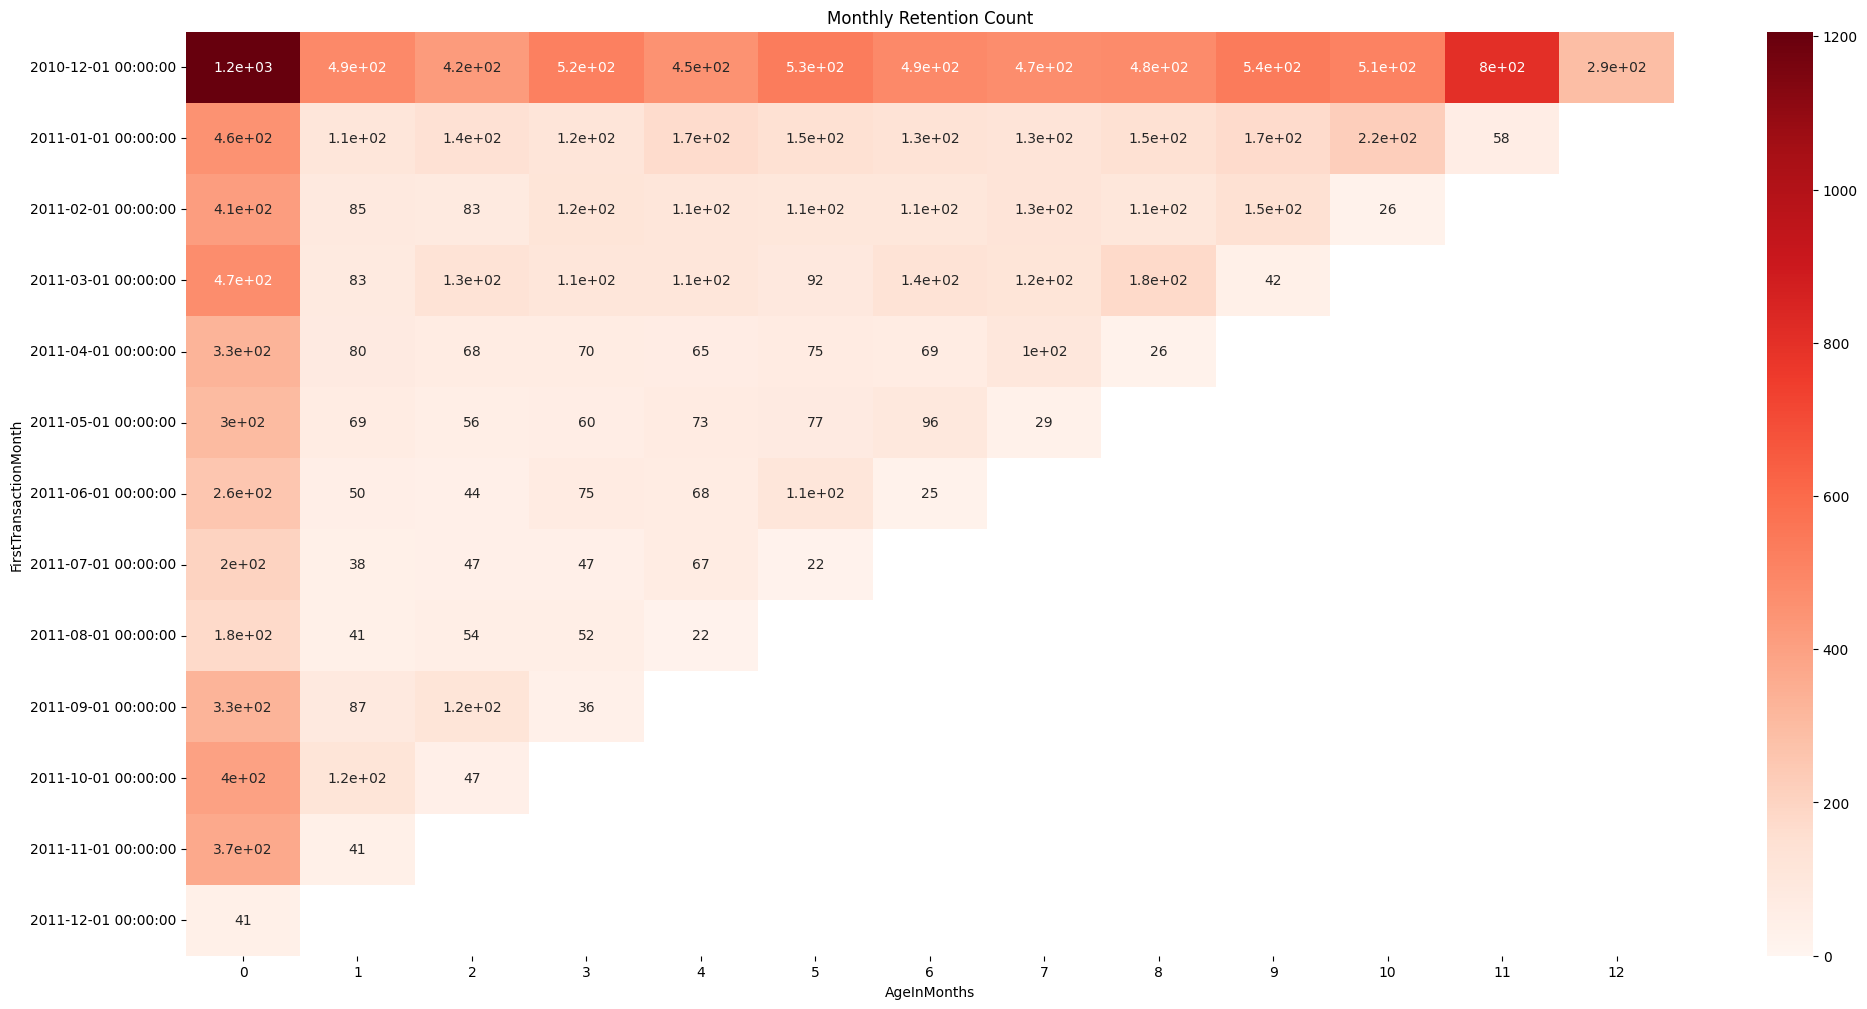

In [51]:
## User Count heatmap
plt.figure(figsize=(24,12))
plt.ticklabel_format(style='plain')
plt.title('Monthly Retention Count')
ax = sns.heatmap(data=Monthly_Cohort_Counts_df, annot=True, vmin=0.0,cmap='Reds')
ax.set_yticklabels(Monthly_Cohort_Counts_df.index)
fig=ax.get_figure()

# save the image
fig.savefig("Image_of_Monthly_Retention_Counts.png")

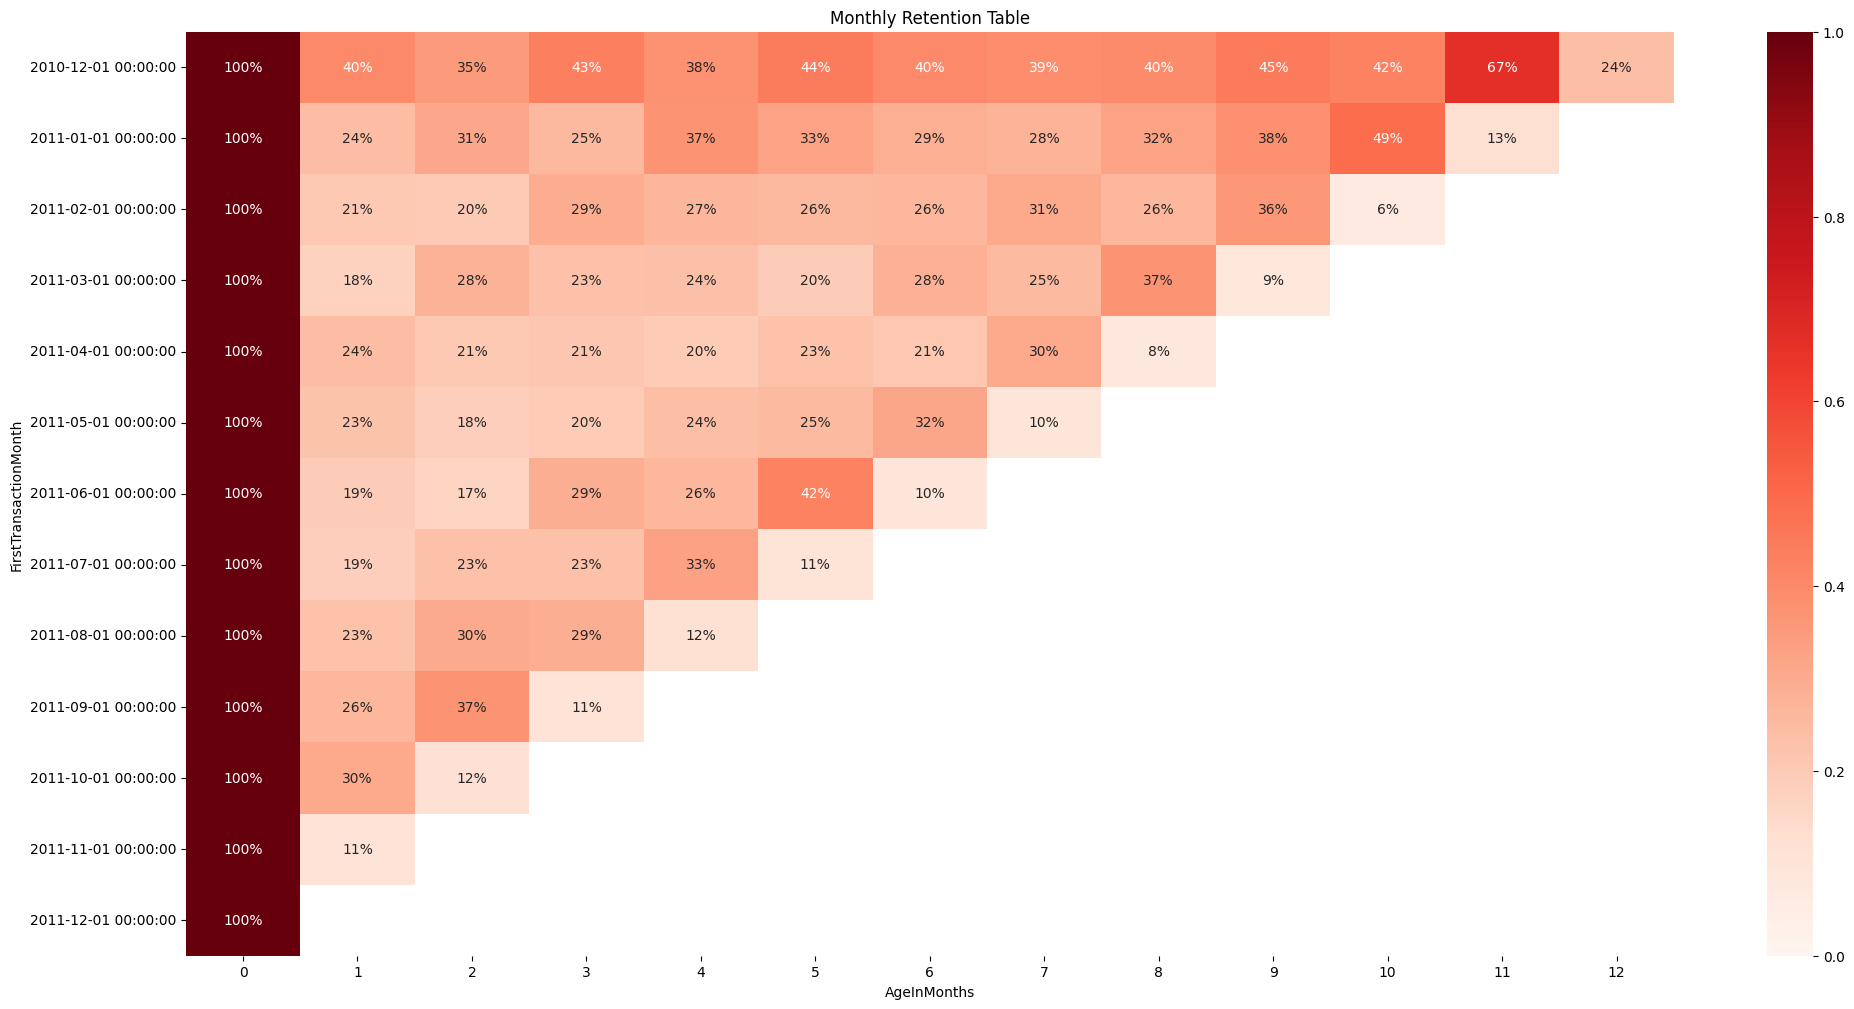

In [50]:
## Monthly Retention Rate heatmap
plt.figure(figsize=(24,12))
plt.title('Monthly Retention Table')
ax = sns.heatmap(data=Monthly_Cohort_Retention_df, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(Monthly_Cohort_Retention_df.index)
fig=ax.get_figure()

# save the figure
fig.savefig("Image_of_Monthly_Cohort_Retention_Rate.png")